In [1]:
import pandas as pd

In [2]:
import uproot

In [3]:
import copy

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm

In [5]:
import numpy as np

In [6]:
#file = uproot.open("/home/tobiasjenegger/some_rootfiles/carbon_target_2198_400amev_run_0183_0001.root")
file = uproot.open("/home/tobiasjenegger/some_rootfiles/carbon_target_1086_400amev_run_0181_0001.root")

#file = uproot.open("/home/tobiasjenegger/some_rootfiles/carbon_target_2198_650amev_run_0130_0001.root")
#file = uproot.open("/home/tobiasjenegger/some_rootfiles/empty_target_2198_400amev_run_0187_0001.root")
#file = uproot.open("/home/tobiasjenegger/some_rootfiles/empty_target_2198_800amev_run_0173_0001.root")


#file = uproot.open("/home/tobiasjenegger/some_rootfiles/carbon_target_2198_800amev_run_0170_0001.root")

#carbon_target_2198_550amev_run_0103_0001.root

In [7]:
print(file.keys()) 

['histlist;1', 'points;1']


In [8]:
tree = file["points"] 

In [9]:
df = tree.arrays(library="pd") 
#A LITTLE BIT DANGEROUS,smooth out df['x']
sigma_x = 0.7
df['x'] = df['x'] + np.random.normal(loc=0, scale=sigma_x, size=len(df))
#df['x'] = df['x'] + np.random.uniform(-0.5, 0.5, size=len(df))


In [10]:
print(df.head())

          x          y
0 -3.777439  12.793793
1 -1.861744  14.398146
2  4.603743  37.581249
3 -0.711325  14.493099
4 -0.124191   5.328796


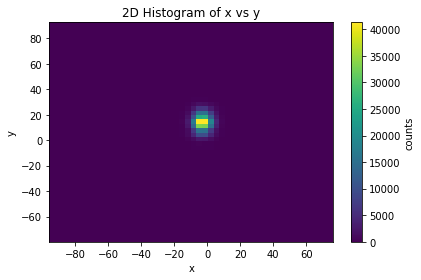

In [11]:
plt.hist2d(df["x"], df["y"], bins=50, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="counts")
plt.title("2D Histogram of x vs y")
plt.tight_layout()
plt.show()

/home/tobiasjenegger/jupy/jup_notebook/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))


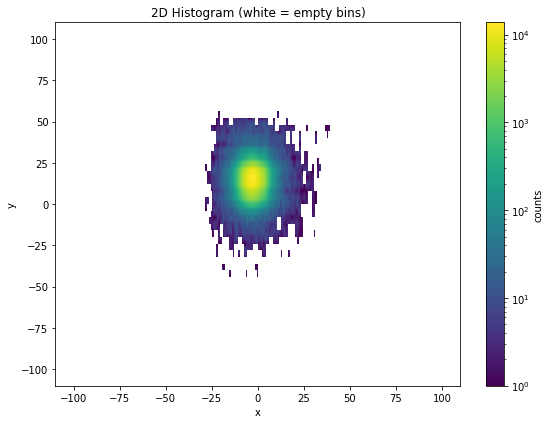

In [12]:
# Create 2D histogram
x = df["x"]
y = df["y"]

# Set binning and plot ranges
x_bins = 220
y_bins = 55
x_range = (-110, 110)    # Change as needed
y_range = (-110, 110)  # Change as needed


counts, xedges, yedges = np.histogram2d(x, y, bins=[x_bins, y_bins], range=[x_range, y_range])

# Mask zero counts
masked_counts = np.ma.masked_where(counts == 0, counts)

# Create a colormap with white for masked (empty) bins
cmap = cm.viridis
cmap.set_bad(color='white')

# Plot
plt.figure(figsize=(8, 6))
plt.imshow(masked_counts.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', cmap=cmap,norm=LogNorm())
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Histogram (white = empty bins)")
plt.colorbar(label="counts")
plt.tight_layout()
plt.show()

### plot the x projection

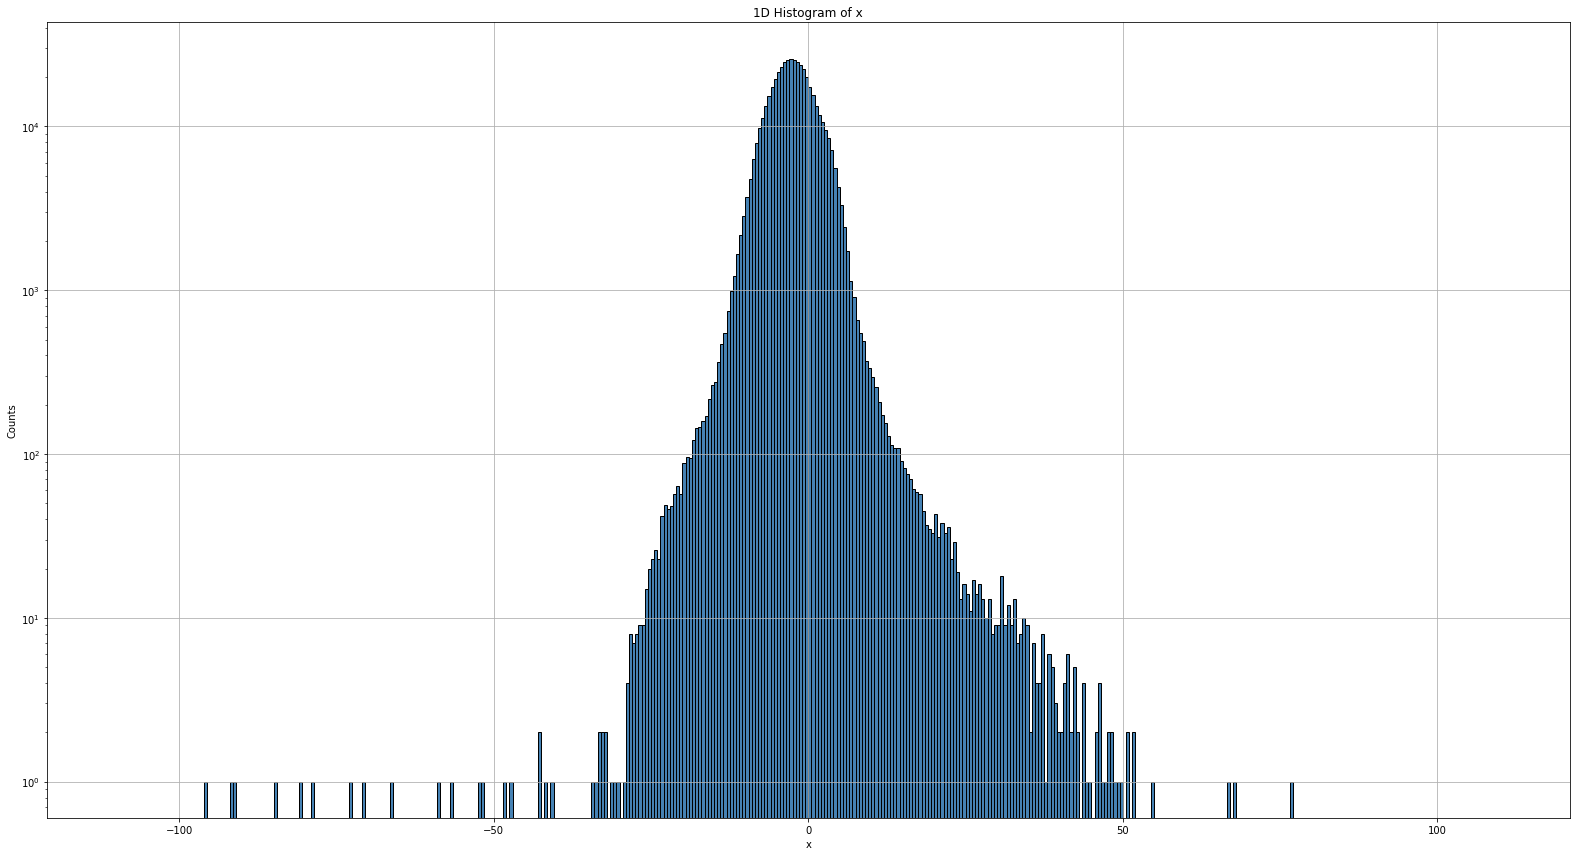

In [13]:
plt.figure(figsize=(22, 12))
plt.hist(df["x"], bins=440, range=(-110, 110), color='steelblue', edgecolor='black')
plt.xlabel("x")
plt.yscale("log")
plt.ylabel("Counts")
plt.title("1D Histogram of x")
plt.grid(True)
plt.tight_layout()
plt.show()

-54.75
WINDOW SIZE:	 6
----------------
positions shape: 215
bin_centers shape (220,)
zero_crossings shape (44,)
integral shape 215
zero crossings
[  2   3   6   7  10  12  15  18  21  22  23  24  25  28  35  40  41  45
  46 101 146 147 148 149 158 160 165 168 179 181 182 183 186 189 196 197
 199 202 203 207 208 209 210 213]
-14362
0.25
and this prints the positions
1.5
[101]
101
x-y
[-3.5, -3.0, -2.5, -2.0]
[7671, 2865, -2437, -6542]
Slope (m): -9588.199999999993
Intercept (b): -25978.299999999985
x where y = 0: -2.7094032247971467
WINDOW SIZE:	 8
----------------
positions shape: 213
bin_centers shape (220,)
zero_crossings shape (28,)
integral shape 213
zero crossings
[  1   2   5   6   9  11  15  16  20  22  28  33  40  44 100 157 158 164
 167 179 180 186 188 194 195 198 206 207]
-22182
0.25
and this prints the positions
2.0
[100]
100
x-y
[-3.5, -3.0, -2.5, -2.0]
[12789, 4811, -3170, -11126]
Slope (m): -15945.19999999999
Intercept (b): -43023.299999999974
x where y = 0: -2.698197576

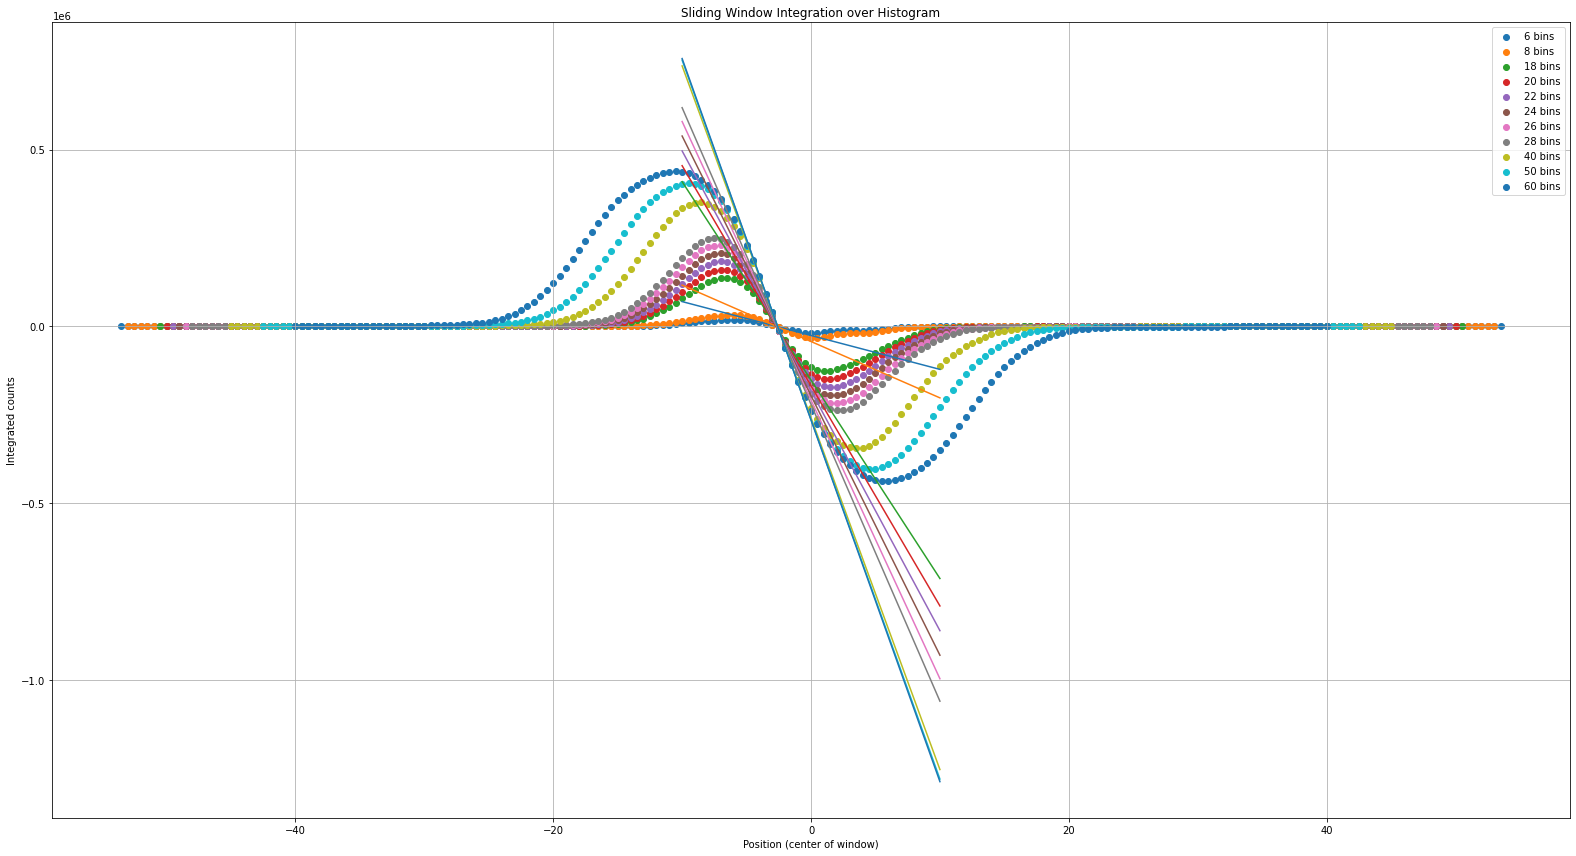

478248


In [14]:
arr_middle_int_points = []
arr_integral_window = []
plt.figure(figsize=(22, 12))

# Create histogram
counts, bin_edges = np.histogram(df["x"], bins=220, range=(-55, 55))

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]
print(bin_centers[0])

# Set window size
#window_size = 20
window_sizes = [6,8,18, 20, 22, 24,26,28,40,50,60]
#window_sizes = [6,8]

for window_size in window_sizes:
    # Integrate over sliding window
    integrals = []
    positions = []

    for i in range(len(counts) - window_size + 1):
        window_counts = counts[i:i+window_size]

        integral = np.sum(window_counts[int(window_size/2):]) - np.sum(window_counts[0:int(window_size/2)])
        integrals.append(integral)
        # Store the center of the window for reference
        center_position = np.mean(bin_centers[i:i+window_size])
        #print("bin centers to consider:\t",bin_centers[i:i+window_size] )
        #print("these center_position", center_position)
        positions.append(center_position)
    plt.scatter(positions, integrals, label=f'{window_size} bins')
    #plt.yscale('log')
    
    print("WINDOW SIZE:\t",window_size)
    zero_crossings = np.where(np.diff(np.sign(integrals)))[0]
    print("----------------")
    print("positions shape:",len(positions))
    print("bin_centers shape",bin_centers.shape)
    print("zero_crossings shape",zero_crossings.shape)
    print("integral shape",len(integrals))
    
    print("zero crossings")
    print(zero_crossings)
    print(integrals[110])
    print(bin_centers[110])
    print("and this prints the positions")
    print(positions[110])
    filtered = zero_crossings[(zero_crossings >=70) & (zero_crossings <= 105)]
    print(filtered)
    if (filtered.shape[0] > 0):
        print(filtered[0])
        x_fit = positions[filtered[0]-1:filtered[0]+3]
        y_fit = integrals[filtered[0]-1:filtered[0]+3]
        print("x-y")
        print(x_fit)
        print(y_fit)
        coeffs = np.polyfit(x_fit, y_fit, deg=1)
        m, b = coeffs
        print(f"Slope (m): {m}")
        print(f"Intercept (b): {b}")
        
        if m != 0:
            x_at_y0 = -b / m
            print(f"x where y = 0: {x_at_y0}")
            arr_middle_int_points.append(x_at_y0)
            arr_integral_window.append(window_size)
            fx = np.linspace(-10,10)
            fy = m*fx+b
            plt.plot(fx,fy)
            
        else:
            print("The fit is horizontal (slope = 0), so y never crosses 0.")
        

    

# Finalize plot
plt.xlabel('Position (center of window)')
plt.ylabel('Integrated counts')
plt.title('Sliding Window Integration over Histogram')
#plt.plot(-2, 0, marker='o', color='red', label='Point (-2, 0)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()    
    
    
print(np.sum(counts))
#print(counts)




In [15]:
#### now the analysis part making the difference between the two sides, left-right
 for index,value in enumerate(arr_middle_int_points):
        integral_right = (df["x"] > value).sum()
        integral_left = (df["x"] < value).sum()
        print("-----------------------------------------")
        print("INTEGRAL WINDOW:\t",arr_integral_window[index])
        print("integral_left:\t", integral_left)
        print("integral_right:\t",integral_right)
        print("diff right-left",integral_right-integral_left )
        print("-----------------------------------------")
        

-----------------------------------------
INTEGRAL WINDOW:	 6
integral_left:	 232961
integral_right:	 245301
diff right-left 12340
-----------------------------------------
-----------------------------------------
INTEGRAL WINDOW:	 8
integral_left:	 233489
integral_right:	 244773
diff right-left 11284
-----------------------------------------
-----------------------------------------
INTEGRAL WINDOW:	 18
integral_left:	 232887
integral_right:	 245375
diff right-left 12488
-----------------------------------------
-----------------------------------------
INTEGRAL WINDOW:	 20
integral_left:	 233216
integral_right:	 245046
diff right-left 11830
-----------------------------------------
-----------------------------------------
INTEGRAL WINDOW:	 22
integral_left:	 233967
integral_right:	 244295
diff right-left 10328
-----------------------------------------
-----------------------------------------
INTEGRAL WINDOW:	 24
integral_left:	 234931
integral_right:	 243331
diff right-left 8400
-

[-2.7094032247971467, -2.698197576700198, -2.71084146315392, -2.7035338968897347, -2.6891197283763595, -2.670128023921764, -2.650192598532293, -2.6329144986372386, -2.5983761549374456, -2.5962835047085577, -2.5944194259277005]
11


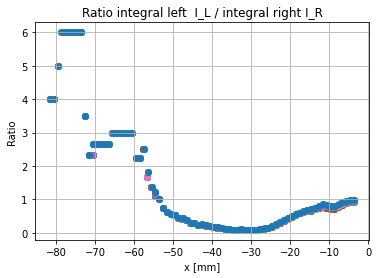

In [16]:
#plt.figure(figsize=(10, 22))
#arr_middle_int_points = [-2,-5,5]
print(arr_middle_int_points)
print(len(arr_middle_int_points))
for i in range(len(arr_middle_int_points)):
    lf_x = []
    lf_r = []
    inx = []
    int_diff_right_left = []
    for j in range(1,80):
        integral_right = (df["x"] > (arr_middle_int_points[i]+j)).sum()
        integral_left = (df["x"] < (arr_middle_int_points[i]-j)).sum()
        inx.append(j)
        int_diff_right_left.append(integral_right - integral_left)
        if integral_right != 0:
            lf_x.append(arr_middle_int_points[i]-j)
            ratio_left_right = integral_left/integral_right
            lf_r.append(ratio_left_right)
        #print("ratio_left_right:",ratio_left_right)
    #if i == 3:    
    plt.scatter(lf_x,lf_r,label=f'Group {i}')

    #plt.scatter(inx,int_diff_right_left)
plt.xlabel("x [mm]")
plt.ylabel("Ratio")
plt.grid()
plt.title("Ratio integral left  I_L / integral right I_R")
#plt.legend()
#plt.show()
#plt.ylim((0,1))
plt.savefig("ratio_left_right.png",dpi=300)

### -----


Accessing contents of histlist:
Processing item 0: Event Distribution over Time (Class: <class 'uproot.models.TH.Model_TH1F_v3'>)
Processing item 1: High TWIM multiplicity over Time (Class: <class 'uproot.models.TH.Model_TH1F_v3'>)
Processing item 2: Section0: Energy AnodeID 0 (Class: <class 'uproot.models.TH.Model_TH1F_v3'>)
Processing item 3: Section0: Energy AnodeID 0 calibrated to anode5 (Class: <class 'uproot.models.TH.Model_TH1F_v3'>)
Processing item 4: Section0: Time AnodeID 0 (Class: <class 'uproot.models.TH.Model_TH1F_v3'>)
Processing item 5: Section0: Energy AnodeID 0 after strict cuts on r3bmusic and mw0 (Class: <class 'uproot.models.TH.Model_TH1F_v3'>)
Processing item 6: Section0: Time AnodeID 0 after stric cuts on r3bmusic and mw0 (Class: <class 'uproot.models.TH.Model_TH1F_v3'>)
Processing item 7: R3BMusic AnodeID 0 Energy no cuts (Class: <class 'uproot.models.TH.Model_TH1F_v3'>)
Processing item 8: R3BMusic AnodeID 0 Energy strict cuts on r3bmusic and MW0 (Class: <class 

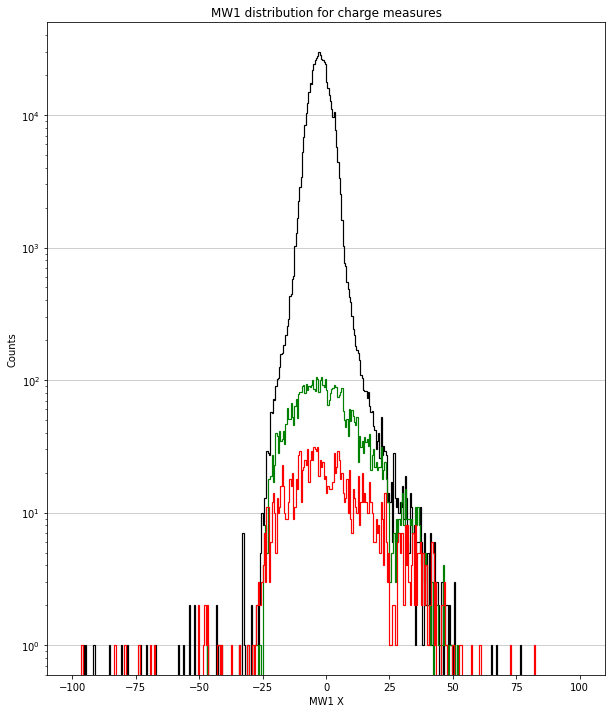

In [17]:
plt.figure(figsize=(10, 12))
if "histlist;1" in file:
            histlist = file["histlist;1"]
            print("\nAccessing contents of histlist:")

            for i, item in enumerate(histlist):
                
                item_name = getattr(item, "name", f"Unnamed_Item_{i}")
                item_classname = str(type(item)) 

                print(f"Processing item {i}: {item_name} (Class: {item_classname})")
                if item_name == "CHARGE rough, Z = 6, MW1 distribution":
                    histo_z6 = item
                    val_6, bins = histo_z6.to_numpy()
                if item_name == "CHARGE rough, Z = 5, MW1 distribution":
                    histo_z5 = item
                    val_5,bins = histo_z5.to_numpy()
                if item_name == "CHARGE rough, Z < 5, MW1 distribution":
                    histo_z4 = item
                    val_4,bins = histo_z4.to_numpy()
                    
                



plt.hist(bins[:-1], bins, weights=val_6, histtype='step', edgecolor='black', linewidth=1.2)
plt.hist(bins[:-1], bins, weights=val_5, histtype='step', edgecolor='green', linewidth=1.2)
plt.hist(bins[:-1], bins, weights=val_4, histtype='step', edgecolor='red', linewidth=1.2)
plt.xlabel("MW1 X")  # x pos mw1
plt.ylabel("Counts")  # Counts
plt.title("MW1 distribution for charge measures")  
plt.grid(axis='y', alpha=0.75)
plt.yscale("log")
plt.show()

In [18]:


ratio = np.full_like(val_5, np.nan, dtype=float)

# Case 1: Denominator is non-zero
non_zero_denominator_indices = val_6 != 0
ratio[non_zero_denominator_indices] = val_5[non_zero_denominator_indices] / val_6[non_zero_denominator_indices]

# Case 2: Both numerator and denominator are zero (0/0)
both_zero_indices = (val_5 == 0) & (val_6 == 0)
ratio[both_zero_indices] = 0.0 # Set to 0.0 if both are zero
ratio[np.isnan(ratio)] = 0
ratio_5_6 = copy.deepcopy(ratio)
#print(ratio)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

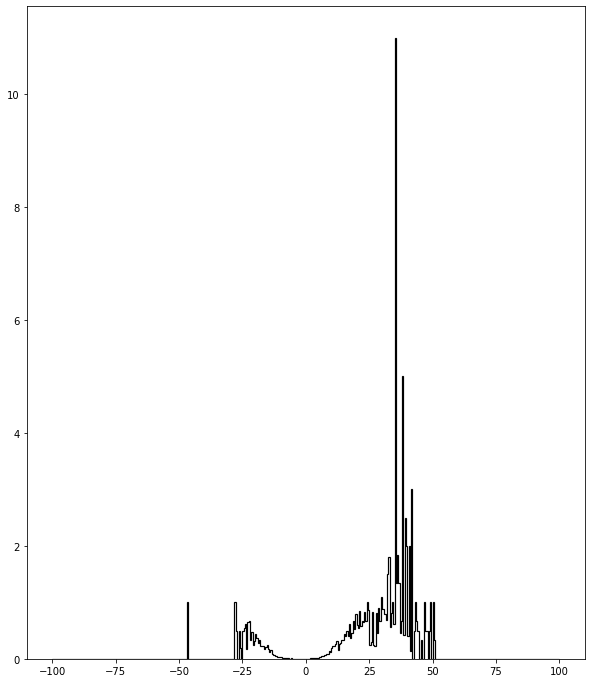

In [19]:
plt.figure(figsize=(10, 12))
plt.hist(bins[:-1], bins, weights=ratio, histtype='step', edgecolor='black', linewidth=1.2)


In [20]:
ratio = np.full_like(val_4, np.nan, dtype=float)

# Case 1: Denominator is non-zero
non_zero_denominator_indices = val_6 != 0
ratio[non_zero_denominator_indices] = val_4[non_zero_denominator_indices] / val_6[non_zero_denominator_indices]

# Case 2: Both numerator and denominator are zero (0/0)
both_zero_indices = (val_4 == 0) & (val_6 == 0)
ratio[both_zero_indices] = 0.0 # Set to 0.0 if both are zero
ratio[np.isnan(ratio)] = 0
ratio_4_6 = copy.deepcopy(ratio)
#print(ratio)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

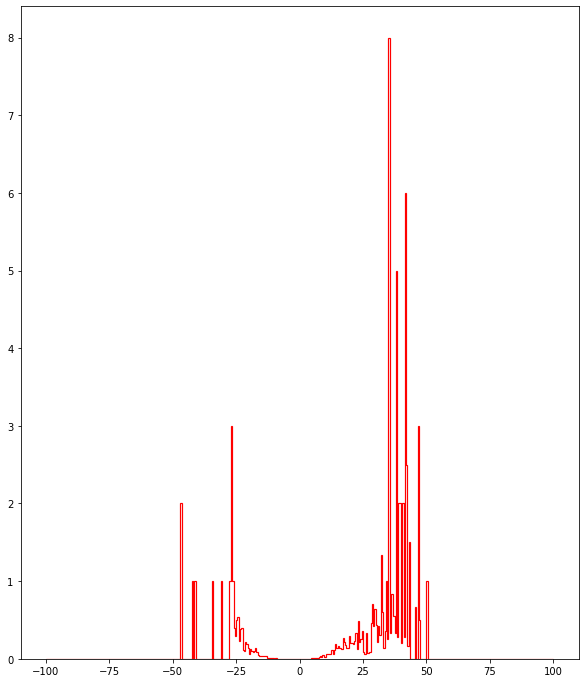

In [21]:
plt.figure(figsize=(10, 12))
plt.hist(bins[:-1], bins, weights=ratio, histtype='step', edgecolor='red', linewidth=1.2)

---

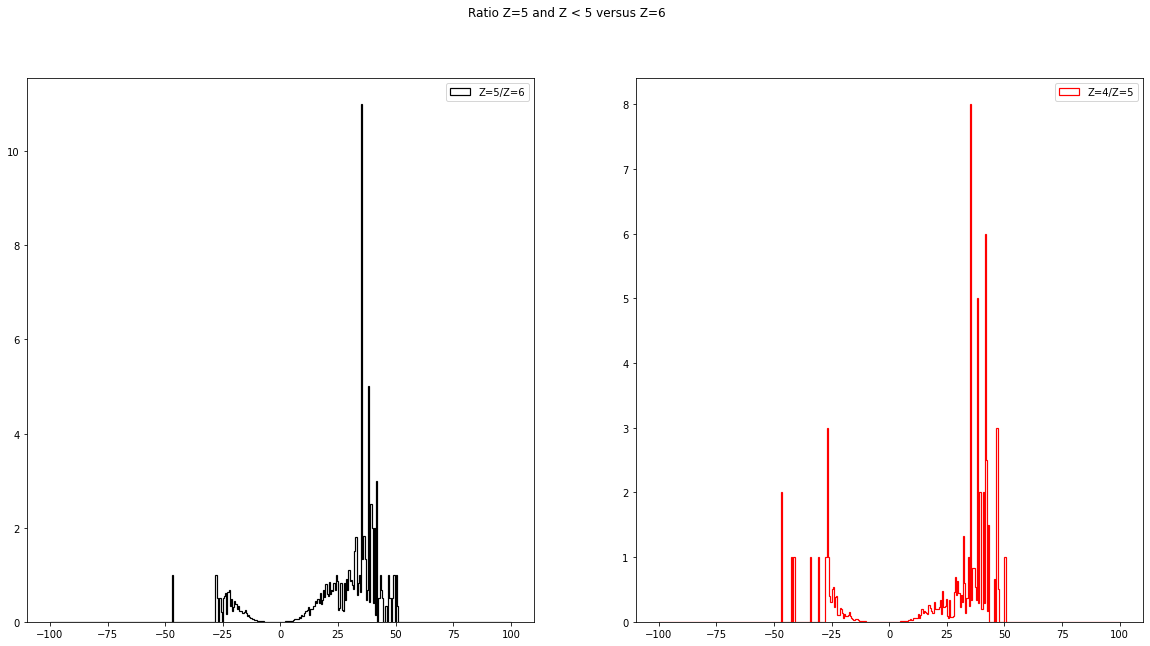

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))

fig.suptitle('Ratio Z=5 and Z < 5 versus Z=6')
ax1.hist(bins[:-1], bins, weights=ratio_5_6, histtype='step', edgecolor='black', linewidth=1.2,label="Z=5/Z=6")
ax2.hist(bins[:-1], bins, weights=ratio_4_6, histtype='step', edgecolor='red', linewidth=1.2,label="Z=4/Z=5")
ax1.legend()
ax2.legend()


In [23]:
mean_val_mw1_x = arr_middle_int_points[0] + 0.45 #best: arr_middle_int_points[0] + 0.25
print(mean_val_mw1_x)
df['x_symmetric'] = df['x'].apply(lambda x: 2 * mean_val_mw1_x - x if x > mean_val_mw1_x else pd.NA)

-2.2594032247971465


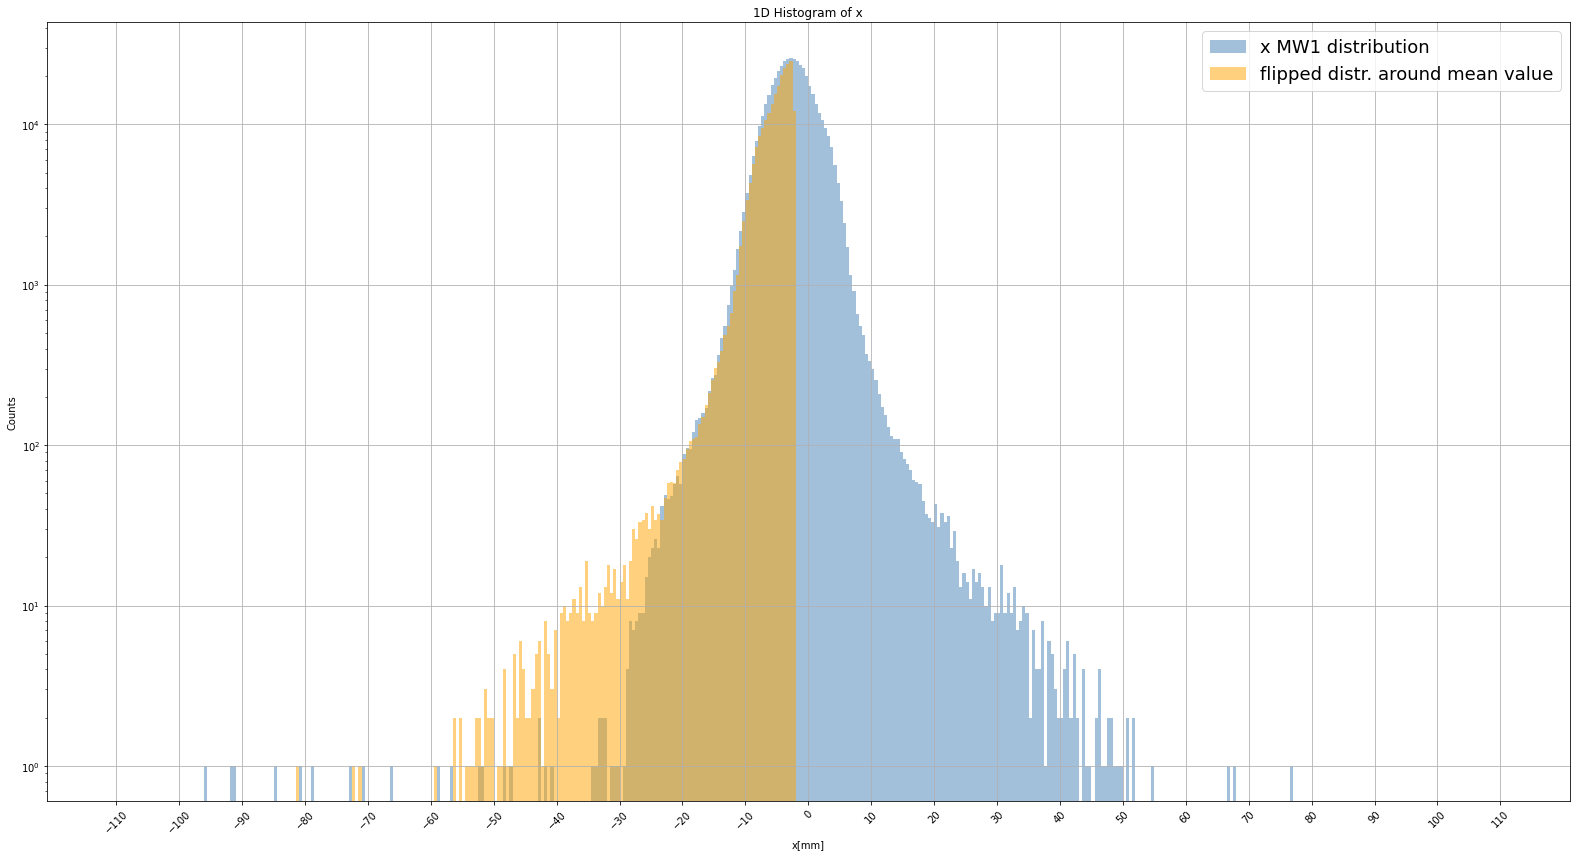

In [24]:
ticks = np.arange(-110, 110 + 0.5, 10)
plt.figure(figsize=(22, 12))
plt.hist(df["x"], bins=440, range=(-110, 110), color='steelblue',alpha=0.5,label="x MW1 distribution")
plt.hist(df["x_symmetric"].dropna(), bins=440, range=(-110, 110), color='orange',alpha=0.5,label="flipped distr. around mean value")
plt.xlabel("x[mm]")
plt.yscale("log")
plt.ylabel("Counts")
plt.title("1D Histogram of x")
plt.xticks(ticks, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=18)
#plt.show()
plt.savefig("mw1_x_distr_flipped.png",dpi=300)

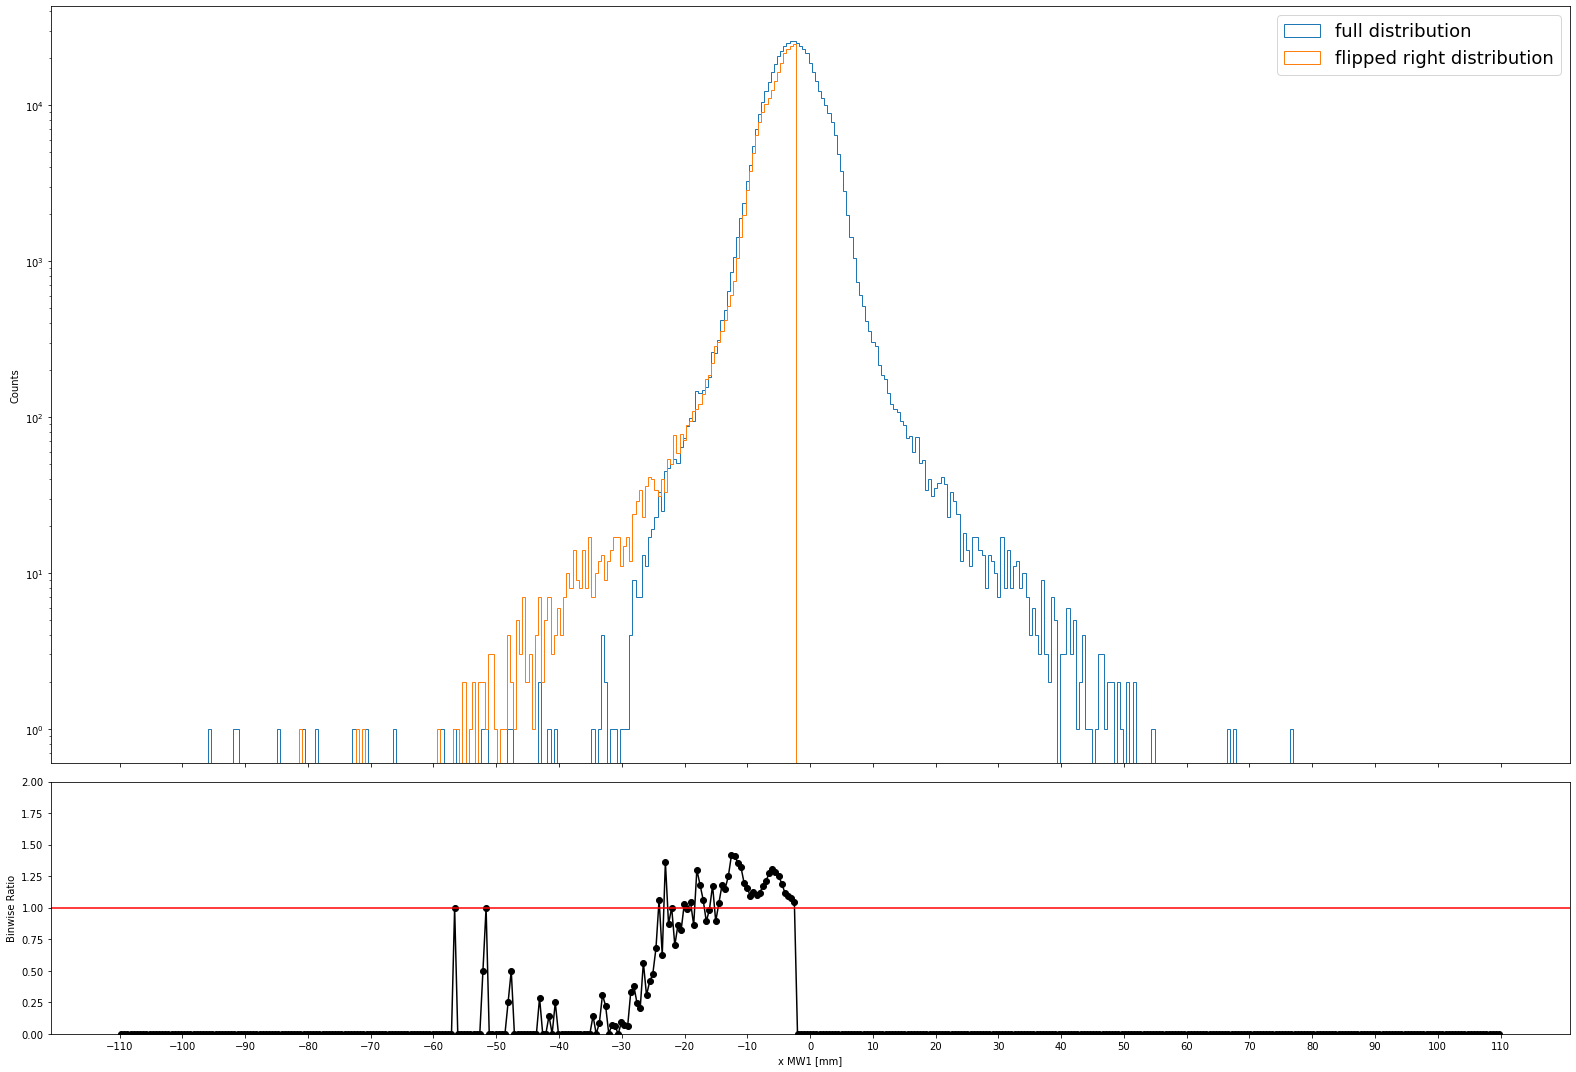

<class 'numpy.ndarray'>
[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(439,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.   

In [25]:
ticks = np.arange(-110, 110 + 0.5, 10)

# Define shared bins
bins = np.linspace(-110, 110, 440)

# Compute histograms for selected column
hist1, bin_edges = np.histogram(df['x'], bins=bins)
hist2, _ = np.histogram(df['x_symmetric'].dropna(), bins=bins)

# Compute bin centers
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Calculate ratio safely
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = np.true_divide(hist1, hist2)
    ratio[~np.isfinite(ratio)] = 0  # Replace NaN, inf

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               gridspec_kw={'height_ratios': [3, 1]},
                               figsize=(22, 15))

# Histogram plots
ax1.hist(df['x'], bins=bins, histtype='step', label='full distribution')
ax1.hist(df['x_symmetric'].dropna(), bins=bins, histtype='step', label='flipped right distribution')
ax1.legend(fontsize=18)
ax1.set_ylabel('Counts')
ax1.set_yscale('log')
ax1.set_xticks(ticks)
# Ratio plot
#ax2.hist(ratio[~np.isnan(ratio)], bins=10, edgecolor='black')
ax2.plot(bin_centers, ratio, marker='o', linestyle='solid', color='black')
#ax2.hist(ratio, bins=bins, edgecolor='black')
ax2.set_ylabel('Binwise Ratio')
ax2.set_xlabel('x MW1 [mm]')
ax2.set_ylim(0, 2)
ax2.set_xticks(ticks)
ax2.axhline(y=1, color='r', linestyle='-')

plt.tight_layout()
plt.savefig("mw1_x_distr_flipped_and_bin_ratio.png",dpi=300)
plt.show()
print(type(ratio))
print(hist1[75:100])
print(hist2[75:100])
print(hist1.shape)
print(ratio)

In [26]:
bins = np.linspace(-110, 110, 440)
#print(bins.shape)
#print(bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
print(bin_centers.shape)


(439,)


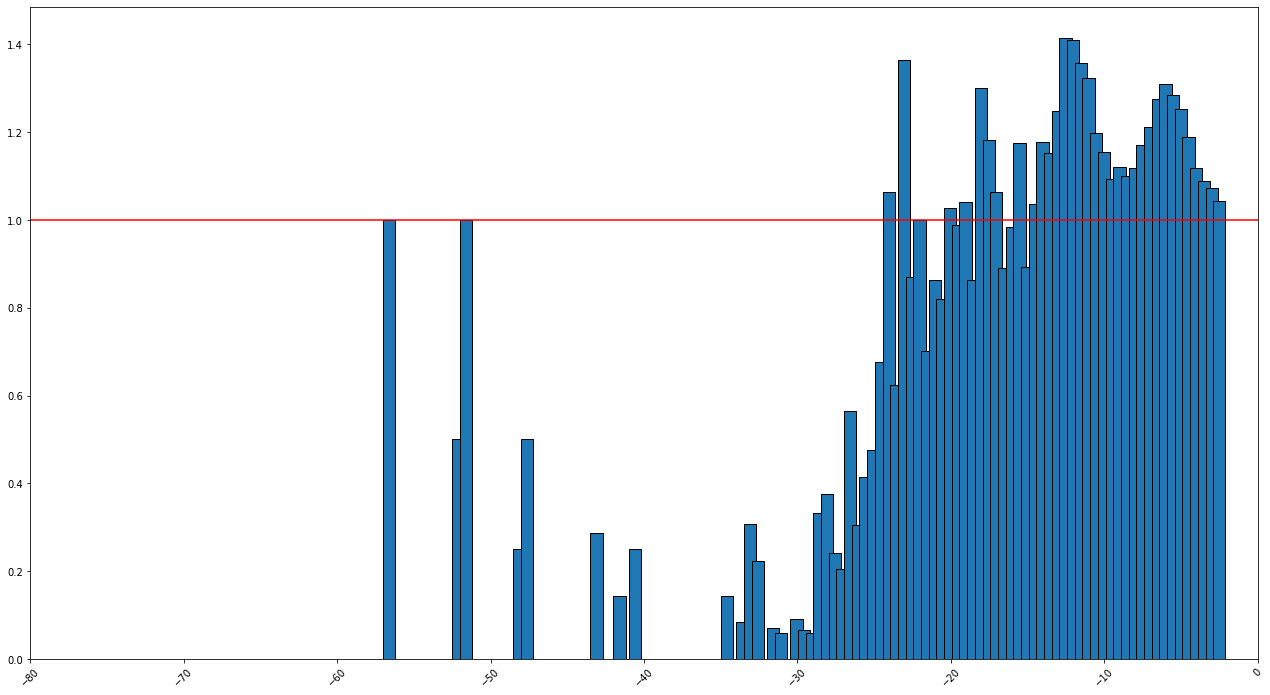

<Figure size 1584x864 with 0 Axes>

In [27]:
plt.figure(figsize=(22, 12))
ticks = np.arange(-110, 110 + 0.5, 10)
plt.xticks(ticks, rotation=45)
plt.bar(bin_centers,ratio,edgecolor="black")
plt.axhline(y=1, color='r', linestyle='-')
plt.xlim((-80,0))
plt.figure(figsize=(22, 12))
plt.savefig("zoomed_binwise_ratio.png",dpi=300)

### just another try to smoothen the distribution

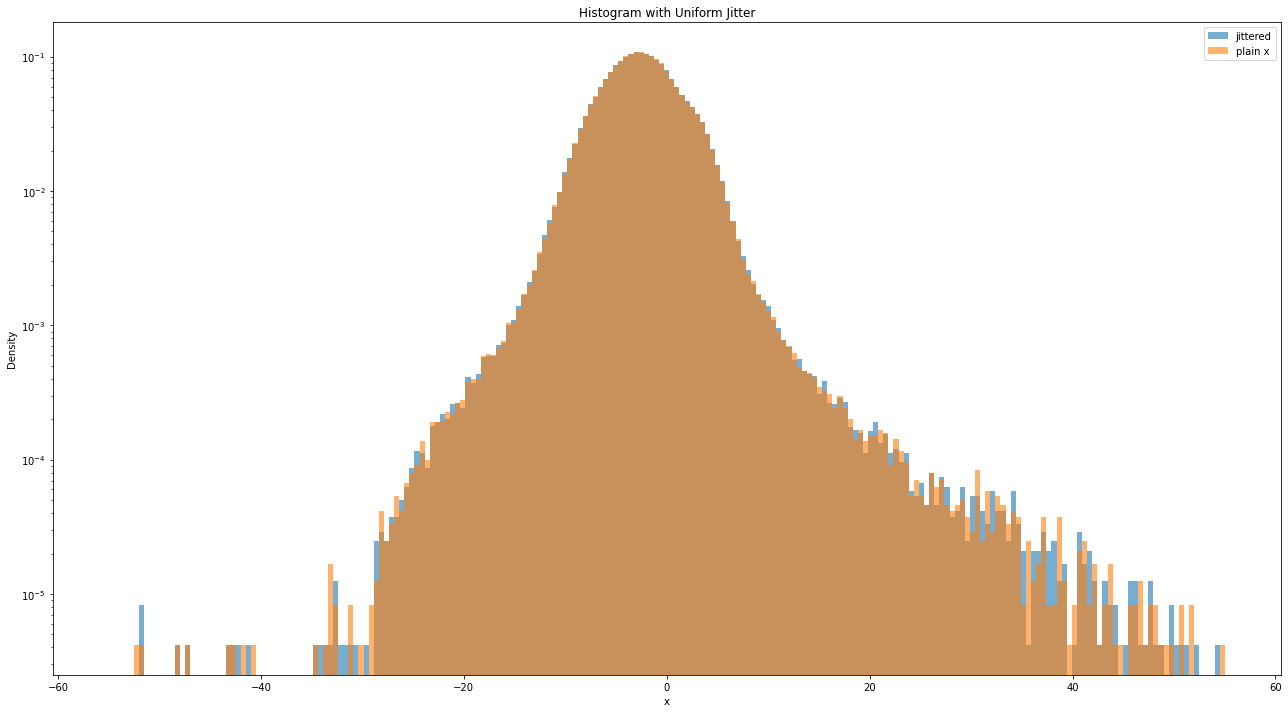

In [28]:
plt.figure(figsize=(22, 12))
jittered_x = df['x'] + np.random.uniform(-0.5, 0.5, size=len(df))
bins = np.linspace(-55, 55, 220)
plt.hist(jittered_x, bins=bins, density=True, alpha=0.6,label="jittered")
plt.hist(df['x'], bins=bins, density=True, alpha=0.6,label="plain x")
plt.title("Histogram with Uniform Jitter")
plt.xlabel("x")
plt.legend()
plt.yscale("log")
plt.ylabel("Density")
plt.show()

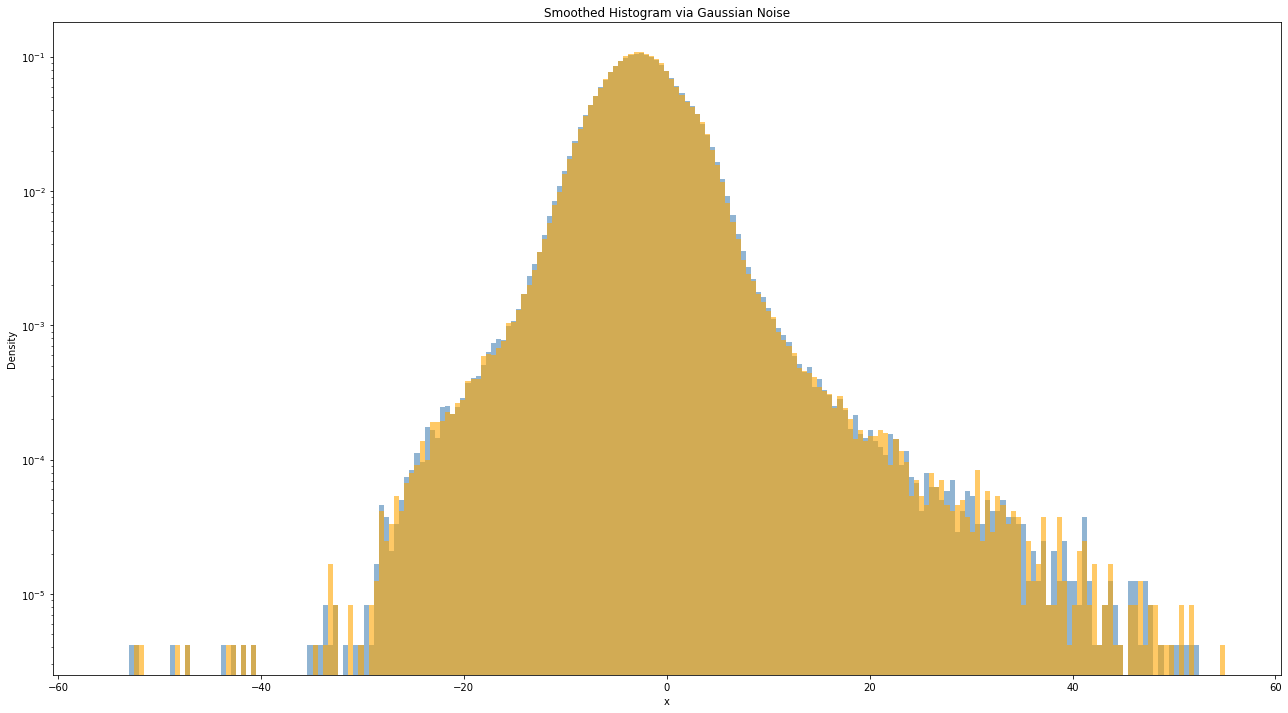

In [29]:
import numpy as np
import matplotlib.pyplot as plt
sigma_x = 0.7
# Make a smeared version of 'x'
smeared_x = df['x'] + np.random.normal(loc=0, scale=sigma_x, size=len(df))
plt.figure(figsize=(22, 12))
# Plot histogram
plt.hist(smeared_x, bins=bins, density=True, alpha=0.6, color='steelblue',label='gaussian smeared')
plt.hist(df['x'], bins=bins, density=True, alpha=0.6,label="plain x",color="orange")
plt.title("Smoothed Histogram via Gaussian Noise")
plt.xlabel("x")
plt.ylabel("Density")
plt.yscale("log")
plt.show()

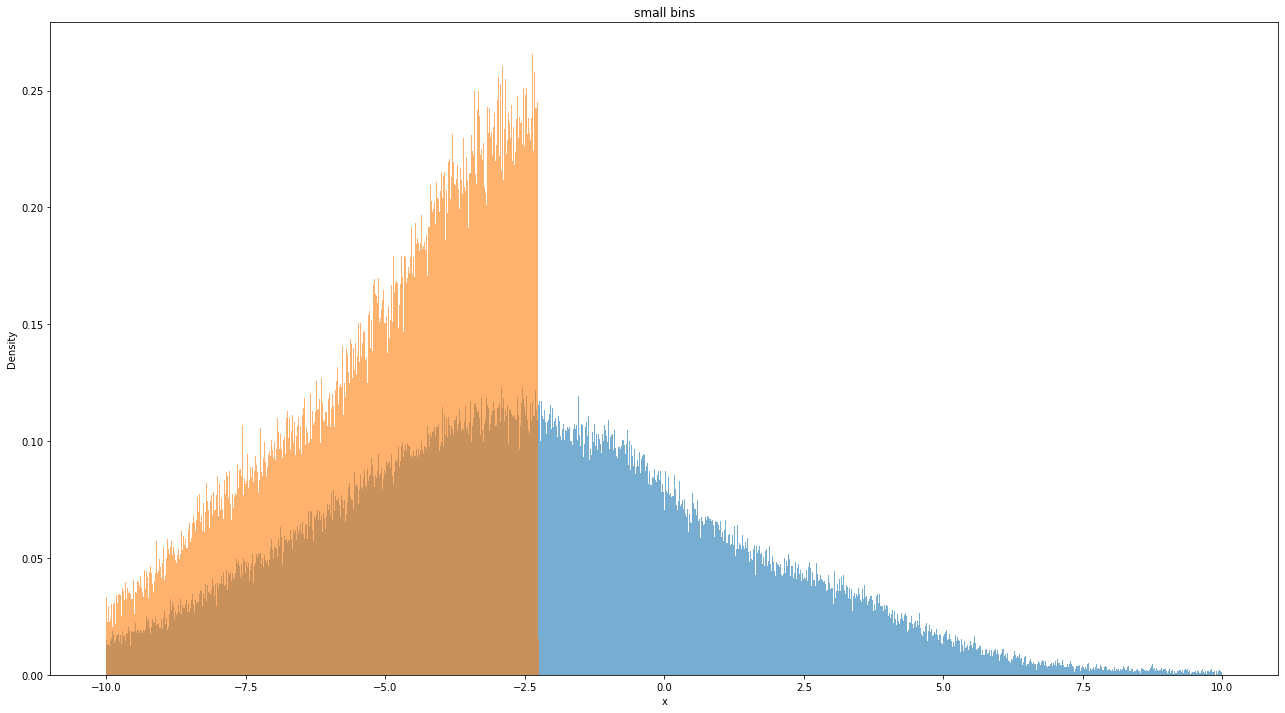

In [30]:
plt.figure(figsize=(22, 12))
bins = np.linspace(-10, 10, 2200)

# Plot histogram
plt.hist(df['x'], bins=bins, density=True, alpha=0.6,label="plain x",)
plt.hist(df['x_symmetric'].dropna(), bins=bins, density=True, alpha=0.6,label="plain x",)
plt.title("small bins")
plt.xlabel("x")
plt.ylabel("Density")
#plt.yscale("log")
plt.show()